In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
!pip install emoji

You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
import emoji

## Data Preparation


In [4]:
data = pd.read_csv("WhatsApp Chat with Bois in da hood🌚😎.txt", sep = '/20, ', names = ['Date', 'Message']) # error_bad_lines=False
data

<ipython-input-4-16356bde6379>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("WhatsApp Chat with Bois in da hood🌚😎.txt", sep = '/20, ', names = ['Date', 'Message']) # error_bad_lines=False


,Date,Message
0,5/19,1:19 PM - Messages to this group are now secur...
1,5/19,"1:19 PM - Siddharth Chitkara created group ""Bros"""
2,5/19,1:19 PM - Siddharth Chitkara added you
3,5/19,1:19 PM - Siddharth Chitkara: whatsup bros
4,5/19,1:19 PM - Aniket Uca C1: Hey Bros､溟沛ｻ
...,...,...
5105,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5106,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5107,8/19,4:55 PM - Dhritanshu Aggarwal Chitkara: <Media...
5108,8/19,4:58 PM - Aniket Uca C1: 櫨櫨


In [5]:
# As we see above read_csv is not suitable for this file, therefore I am going to instead transform it into a list of strings
def read_file(file):
    f = open(file,'r', encoding = 'utf-8') # Read-only
    f_str = f.read() # Convert to string
    f_str_list = f_str.splitlines() # Converts the chunk of string into a list of strings
    return f_str_list

data = read_file('WhatsApp Chat with Bois in da hood🌚😎.txt')

In [6]:
type(data)

list

In [7]:
len(data)

5157

In [8]:
data[:10]

['5/19/20, 1:19 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.',
 '5/19/20, 1:19 PM - Siddharth Chitkara created group "Bros"',
 '5/19/20, 1:19 PM - Siddharth Chitkara added you',
 '5/19/20, 1:19 PM - Siddharth Chitkara: whatsup bros',
 '5/19/20, 1:19 PM - Aniket Uca C1: Hey Bros🤟🏻',
 '5/19/20, 1:19 PM - Aniket Uca C1: Aaj aag lagani hai 🔥😎',
 '5/19/20, 1:20 PM - Dhritanshu Aggarwal Chitkara: Hola',
 '5/19/20, 1:20 PM - Devang Kapoor: Yo bros!',
 '5/19/20, 1:20 PM - Siddharth Chitkara: kuch aata hoga toh lagegi aag 😂',
 "5/19/20, 1:20 PM - Devang Kapoor: That's the spirit"]

In [15]:
# Removing the elements that are not of date format
def check_date(data):  
    for i in range(len(data)):
        try:
            datetime.datetime.strptime(data[i].split(',')[0], '%m/%d/%y') # Converts string date into a date object
        except ValueError: # Returns an error if the string is not a datetime object
            data[i-1] += ' ' + data[i] # Appends the next line to the previous line
            data[i] = "NA" # Replace the unwanted text element with 'NA'

    #Handle more than double-line texting
    for i in range(len(data)):
        if data[i].split(' ')[0] == 'NA':
            data[i] = 'NA'

    while True:
        try:
            data.remove("NA")
        except ValueError:
            break

check_date(data)
len(data) # 449 lines are removed

4708

## Feature Extraction

In [17]:
# Using split() funtion extracting the features like - date, time, name and message

date = [text.split(',')[0] for text in data] 

time = [t.split(',')[1].split('-')[0] for t in data]
time = [t.strip(' ') for t in time] # Remove spacing

name = [n.split('-')[1].split(':')[0] for n in data]
name = [n.strip(' ') for n in name] # Remove spacing

message = []
for i in range(len(data)):
    try:
        message.append(data[i].split(':')[2])
    except IndexError:
        message.append('Missing Text') # Not missing per se, just doesn't fit the format of df I chose

message = [m.lstrip(' ') for m in message] # Remove spacing


In [18]:
df = pd.DataFrame(list(zip(date, time, name, message)), columns = ['Date', 'Time', 'Name', 'Message'])
df.head()

,Date,Time,Name,Message
0,5/19/20,1:19 PM,Messages to this group are now secured with end,Missing Text
1,5/19/20,1:19 PM,"Siddharth Chitkara created group ""Bros""",Missing Text
2,5/19/20,1:19 PM,Siddharth Chitkara added you,Missing Text
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻


In [19]:
df.tail()

,Date,Time,Name,Message
4703,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4704,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4705,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4706,8/19/20,4:58 PM,Aniket Uca C1,🔥🔥
4707,8/19/20,6:34 PM,Devang Kapoor,😂😂😂😂


## Data Analysis

In [20]:
df[df['Message'] == 'Missing Text'] # There are 6 of such statements and they provide very less value in analyzing and exploring the data

,Date,Time,Name,Message
0,5/19/20,1:19 PM,Messages to this group are now secured with end,Missing Text
1,5/19/20,1:19 PM,"Siddharth Chitkara created group ""Bros""",Missing Text
2,5/19/20,1:19 PM,Siddharth Chitkara added you,Missing Text
55,5/19/20,1:26 PM,Dhritanshu Aggarwal Chitkara changed the subje...,Missing Text
100,5/19/20,4:18 PM,Aniket Uca C1 changed this group's icon,Missing Text
102,5/19/20,4:32 PM,You're now an admin,Missing Text


In [21]:
df = df.drop([0, 1, 2, 55, 100, 102]) # Therefore they are being dropped
df[df['Message'] == 'Missing Text']

,Date,Time,Name,Message


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 3 to 4707
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4702 non-null   object
 1   Time     4702 non-null   object
 2   Name     4702 non-null   object
 3   Message  4702 non-null   object
dtypes: object(4)
memory usage: 110.2+ KB


In [23]:
df.describe()

,Date,Time,Name,Message
count,4702,4702,4702,4702
unique,92,936,5,2822
top,5/23/20,10:49 AM,Vidhuyn UCA C1,<Media omitted>
freq,239,26,2026,878


This seems accurate. The chat consists of the content between 19th May to 19th August amassing upto 92 days.

According to this Vidhyun sends a lot of messages and most of it is media. Let's verify that.

In [24]:
df.groupby('Name')[['Message']].aggregate('count')

,Message
Name,
Aniket Uca C1,986
Devang Kapoor,132
Dhritanshu Aggarwal Chitkara,1155
Siddharth Chitkara,403
Vidhuyn UCA C1,2026


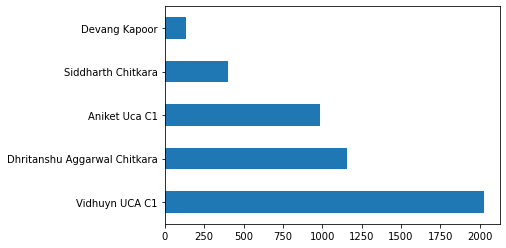

In [25]:
messages_per_person = df['Name'].value_counts() # Number of messages per person
top_10 = messages_per_person.head(10) # Number of messages per person for the top 10 most active people
top_10.plot.barh(); # Plot a bar chart using pandas built-in plotting apis

In [26]:
df[df.Name.values == 'Devang Kapoor']

,Date,Time,Name,Message
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!
9,5/19/20,1:20 PM,Devang Kapoor,That's the spirit
32,5/19/20,1:23 PM,Devang Kapoor,Lekin cheating mein sabh se aage vo
40,5/19/20,1:23 PM,Devang Kapoor,Areh sujeet ko bhi daalo. Vo bhi jugadu banda ...
44,5/19/20,1:24 PM,Devang Kapoor,Soch samjhkar daal lo
...,...,...,...,...
4631,8/15/20,9:03 PM,Devang Kapoor,"Damn bro, thought this was a joke at first Bu..."
4634,8/15/20,9:04 PM,Devang Kapoor,😂😂😂
4635,8/15/20,9:04 PM,Devang Kapoor,Yeah
4636,8/15/20,9:04 PM,Devang Kapoor,Hope it's great


In [27]:
df_media = df[df.Message.values == '<Media omitted>']
df_media

,Date,Time,Name,Message
10,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
115,5/20/20,3:56 PM,Vidhuyn UCA C1,<Media omitted>
189,5/20/20,6:38 PM,Vidhuyn UCA C1,<Media omitted>
201,5/20/20,8:15 PM,Vidhuyn UCA C1,<Media omitted>
226,5/21/20,3:40 PM,Vidhuyn UCA C1,<Media omitted>
...,...,...,...,...
4699,8/19/20,11:54 AM,Vidhuyn UCA C1,<Media omitted>
4702,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4703,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>
4704,8/19/20,4:55 PM,Dhritanshu Aggarwal Chitkara,<Media omitted>


In [29]:
# Number of media messages per person
df_media = df_media.groupby('Name')[['Message']].aggregate('count')
df_media

,Message
Name,
Aniket Uca C1,66
Devang Kapoor,9
Dhritanshu Aggarwal Chitkara,262
Siddharth Chitkara,1
Vidhuyn UCA C1,540


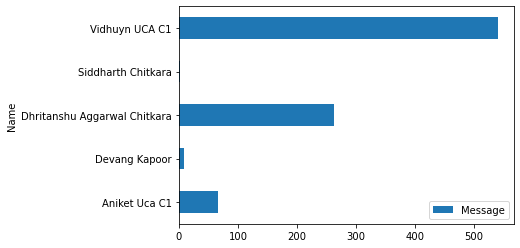

In [30]:
# Plotting the result
df_media.plot.barh();

In [31]:
# Now dropping the media messages as they provide nothing now
df_messages = df.drop(df[df.Message.values == '<Media omitted>'].index)
df_messages.head()

,Date,Time,Name,Message
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!


In [32]:
emoji.demojize("🔥")

':fire:'

In [33]:
emoji.demojize("Aaj aag lagani hai 🔥😎")

'Aaj aag lagani hai :fire::smiling_face_with_sunglasses:'

In [34]:
s2 = '' # Combining all the messages into a string
for n in df_messages.Name.unique():
  s1 = df_messages.Message[df_messages.Name == n]
  s2 += (' ').join(s1.values)

s2[:50]  

'whatsup bros kuch aata hoga toh lagegi aag 😂 ye bt'

In [35]:
emj_count = emoji.emoji_count(s2) # Total emojis used
emj_count

3208

In [36]:
emj = emoji.emoji_lis(s2)
emj[:10]

[{'location': 43, 'emoji': '😂'},
 {'location': 168, 'emoji': '😂'},
 {'location': 221, 'emoji': '👍'},
 {'location': 227, 'emoji': '😂'},
 {'location': 291, 'emoji': '😂'},
 {'location': 292, 'emoji': '😂'},
 {'location': 347, 'emoji': '😂'},
 {'location': 348, 'emoji': '😂'},
 {'location': 358, 'emoji': '😂'},
 {'location': 360, 'emoji': '😂'}]

In [37]:
emj_lst = [list(emj[i].values())[1] for i in range(len(emj))] # List of all the emoji
emj_lst[:10]

['😂', '😂', '👍', '😂', '😂', '😂', '😂', '😂', '😂', '😂']

In [38]:
emj_lst[0] == emj_lst[1]

True

In [40]:
emj_lst_str = ('').join(emj_lst)
emj_lst_str

distinct_emjs = []
for i in emj_lst:
    if i not in distinct_emjs:
        distinct_emjs.append(i)
distinct_emjs[:10]


['😂', '👍', '🔥', '🤛', '🤣', '😄', '🥳', '😎', '🤝', '🤩']

In [42]:
len(distinct_emjs) # There are 110 unique emojis used

110

In [43]:
emoji.demojize(distinct_emjs[6], use_aliases=True) # '\U0001f973'

':partying_face:'

In [44]:
# As there are some emojis in unicode i am converting all to str(demojize the)
dis_demj_lst = [emoji.demojize(i, use_aliases=True) for i in distinct_emjs]
dis_demj_lst[:10]
demj_str = ("").join(dis_demj_lst)
demj_str

':joy::thumbsup::fire::left-facing_fist::rolling_on_the_floor_laughing::smile::partying_face::sunglasses::handshake::star-struck::man_shrugging_selector::tired_face::scream::cold_sweat::ok_hand::smiley::victory_hand_selector::tada::love-you_gesture_light_skin_tone::face_with_hand_over_mouth::man_shrugging_light_skin_tone::right-facing_fist::expressionless::relieved::smiling_imp::smirk::man_gesturing_NO_light_skin_tone::satisfied::dizzy_face::man_tipping_hand_light_skin_tone::grin::triumph::face_with_rolling_eyes::sweat_smile::man_facepalming_light_skin_tone::shushing_face::pleading_face::astonished::face_with_monocle::thumbs_down_light_skin_tone::disappointed::face_with_raised_eyebrow::flushed::fearful::woozy_face::grimacing::face_with_symbols_on_mouth::smiling_face_selector::victory_hand_light_skin_tone::stuck_out_tongue_closed_eyes::confused::clapping_hands_light_skin_tone::cry::unamused::heart_suit_selector::innocent::heart_eyes::see_no_evil::middle_finger_light_skin_tone::right-fac

In [45]:
df_messages['Emoji_in_the_msg'] = df_messages['Message'].apply(lambda e : [list(emoji.emoji_lis(e)[i].values())[1] for i in range(len(emoji.emoji_lis(e)))])
df_messages['Emoji_Count'] = df_messages['Emoji_in_the_msg'].apply(lambda e : len(e))
df_messages.head()

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros,[],0
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻,[🤟🏻],1
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎,"[🔥, 😎]",2
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola,[],0
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!,[],0


In [46]:
df_messages.describe()

,Emoji_Count
count,3824.000000
mean,0.838912
std,3.419519
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,200.000000


In [47]:
# Max Emoji used in a message
df_messages[df_messages['Emoji_Count'] == df_messages['Emoji_Count'].max()]

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count
2794,6/28/20,11:48 AM,Vidhuyn UCA C1,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,"[🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, 🤣, ...",200


In [48]:
emoji_freq_dict = {}

emoji_freq = [emj_lst.count(i) for i in distinct_emjs]

emoji_freq_dict = {distinct_emjs[i] : emoji_freq[i] for i in range(len(distinct_emjs))}

dict(list(emoji_freq_dict.items())[:5])

{'😂': 1560, '👍': 32, '🔥': 75, '🤛': 1, '🤣': 907}

In [49]:
# Which emoji is the most used?
max(emoji_freq_dict, key = emoji_freq_dict.get)

'😂'

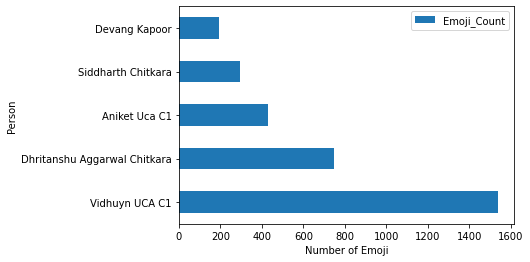

In [50]:
total_emoji_count_grouped_by_name = df_messages[['Name', 'Emoji_Count']].groupby('Name').sum()
sorted_total_emoji_count_grouped_by_name = total_emoji_count_grouped_by_name.sort_values('Emoji_Count', ascending=False)
top_10_sorted_total_emoji_count_grouped_by_name = sorted_total_emoji_count_grouped_by_name.head(10)
top_10_sorted_total_emoji_count_grouped_by_name.plot.barh()
plt.xlabel('Number of Emoji')
plt.ylabel('Person');


In [51]:
list(emoji_freq_dict.keys())[:10]

['😂', '👍', '🔥', '🤛', '🤣', '😄', '🥳', '😎', '🤝', '🤩']

In [52]:
# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# plt.bar(list(emoji_freq_dict.keys())[:10], list(emoji_freq_dict.values())[:10])
# plt.show()

Text(0, 0.5, 'Date')

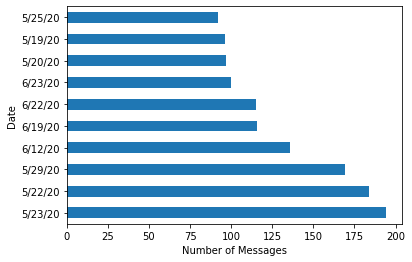

In [53]:
df_messages['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [54]:
df_messages['Letter_Count'] = df_messages['Message'].apply(lambda s : len(s))
df_messages['Word_Count'] = df_messages['Message'].apply(lambda s : len(s.split(' ')))
df_messages.head()

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count,Letter_Count,Word_Count
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros,[],0,12,2
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻,[🤟🏻],1,10,2
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎,"[🔥, 😎]",2,21,5
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola,[],0,4,1
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!,[],0,8,2


In [55]:
df_messages.describe()

,Emoji_Count,Letter_Count,Word_Count
count,3824.000000,3824.000000,3824.000000
mean,0.838912,25.273797,5.015690
std,3.419519,32.182233,5.910198
min,0.000000,1.000000,1.000000
25%,0.000000,4.000000,1.000000
50%,0.000000,15.000000,3.000000
75%,1.000000,35.000000,7.000000
max,200.000000,590.000000,115.000000


In [56]:
df_messages['Letter_Count'].sum()

96647

In [57]:
df_messages['Word_Count'].sum()

19180

In [58]:
df_messages['Hour'] = df_messages['Time'].apply(lambda x : x.split(':')[0])
df_messages

,Date,Time,Name,Message,Emoji_in_the_msg,Emoji_Count,Letter_Count,Word_Count,Hour
3,5/19/20,1:19 PM,Siddharth Chitkara,whatsup bros,[],0,12,2,1
4,5/19/20,1:19 PM,Aniket Uca C1,Hey Bros🤟🏻,[🤟🏻],1,10,2,1
5,5/19/20,1:19 PM,Aniket Uca C1,Aaj aag lagani hai 🔥😎,"[🔥, 😎]",2,21,5,1
6,5/19/20,1:20 PM,Dhritanshu Aggarwal Chitkara,Hola,[],0,4,1,1
7,5/19/20,1:20 PM,Devang Kapoor,Yo bros!,[],0,8,2,1
...,...,...,...,...,...,...,...,...,...
4698,8/19/20,8:36 AM,Aniket Uca C1,😂🤭,"[😂, 🤭]",2,2,1,8
4700,8/19/20,12:00 PM,Aniket Uca C1,Iska ho gaya hai ab. Bekaar hai yeh.,[],0,36,8,12
4701,8/19/20,12:03 PM,Vidhuyn UCA C1,😂😂,"[😂, 😂]",2,2,1,12
4706,8/19/20,4:58 PM,Aniket Uca C1,🔥🔥,"[🔥, 🔥]",2,2,1,4


Text(0, 0.5, 'Hour of Day')

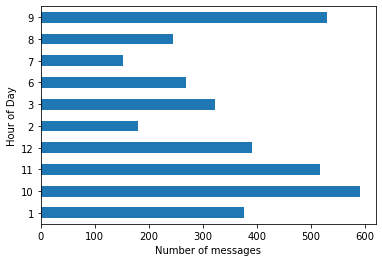

In [59]:
df_messages['Hour'].value_counts().head(10).sort_index(ascending=True).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')


## Autosuggest/Predictive text using Markov Chains

In [60]:
def generateTable(data, k = 4):
    T = {}

    for i in range(len(data)-k):
        X = data[i:i+k]
        y = data[i+k]

        if T.get(X) is None:
            T[X] = {}
            T[X][y] = 1
        else:
            if T[X].get(y) is None:
                T[X][y] = 1
            else:
                T[X][y] += 1

    return T

T = generateTable(s2)
dict(list(T.items())[:5])

{'what': {'s': 4, ' ': 20, '?': 1, ',': 1},
 'hats': {'u': 1, ' ': 1, 'a': 3, 'A': 4},
 'atsu': {'p': 1},
 'tsup': {' ': 1},
 'sup ': {'b': 1}}

In [61]:
list(T.keys())[:5]

['what', 'hats', 'atsu', 'tsup', 'sup ']

In [62]:
list(T.values())[:5]

[{'s': 4, ' ': 20, '?': 1, ',': 1},
 {'u': 1, ' ': 1, 'a': 3, 'A': 4},
 {'p': 1},
 {' ': 1},
 {'b': 1}]

In [63]:
k = 4
initial_value = 'hello'
for i in range(100):
    inval = initial_value[-k:]

    possible_chars = list(T[inval].keys())
    possible_values = list(T[inval].values())

    sum_ = np.sum(possible_values)

    probabs = np.array(possible_values / sum_)

    y = np.random.choice(possible_chars, p = probabs)

    initial_value += y
initial_value

'hellow karne kuch soch se reactive present of Marks ? han idk msg ki bharat hota aisa tere app system sof'